# GRSW observations notebook

This notebook shows how to access the summary table of the observations data compiled for the GRSW workshop.
It require to pull a python package to access easily the data stored on [DACE](https://dace.unige.ch/dashboard/)

### Importing useful functions

First we need to import the function needed for the notebook

In [1]:
from resonantstate.data_download  import get_metadata_observations, download_observations_samples
from resonantstate.analyse_samples import *
from resonantstate.ell2SFM import plot_ell2SFM

We can download the metatable to have a look on the available observations samples

In [2]:
dataframe_observations = get_metadata_observations()
dataframe_observations.head()

,planet_name,star_name,analysis_id,author_name,contact_email,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,...,methods,instruments,transit_definition,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
0,K00972.02,K00972,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,7.821838,1.040388,0.459848,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,K00972.01,K00972,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,13.119837,3.228469,0.064462,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,K01239.01,K01239,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,0.783274,1.454645,7.688309,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,K01239.02,K01239,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,3.174604,1.488855,8.795811,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,K01884.02,K01884,0,Ragozzine,darin_ragozzine@byu.edu,1,-1,4.781612,0.809116,2.257537,...,photo-dynamics,Kepler,90.0,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


We can have a look on the available columns:

In [3]:
dataframe_observations.head(0).T

""
planet_name
star_name
analysis_id
author_name
contact_email
default
robustness
period_days
radius_planet_r_earth
mass_planet_m_earth


Let's look at the list of analysed systems:

In [4]:
dataframe_observations["star_name"].unique()

array(['K00972', 'K01239', 'K01884', 'K02093', 'K02357', 'K02421',
       'K02449', 'K02554', 'K02610', 'K02696', 'K02840', 'K02949',
       'K02972', 'K03029', 'K03083', 'K03111', 'K03196', 'K03209',
       'K03340', 'K03341', 'K03395', 'K03401', 'K03420', 'K03462',
       'K03495', 'K04021', 'K04136', 'K04149', 'K04287', 'K04307',
       'K04421', 'K04435', 'K04504', 'K04526', 'K04535', 'K04541',
       'K04567', 'K04577', 'K04647', 'K04657', 'K04700', 'K04773',
       'K04782', 'K04846', 'K04871', 'K04896', 'K04913', 'K05007',
       'K06093', 'K06103', 'K06120', 'K06178', 'K06182', 'K06191',
       'K06209', 'K06245', 'K06259', 'K06355', 'K07117', 'K07685',
       'K2-266', 'Kepler-10', 'Kepler-100', 'Kepler-1006', 'Kepler-101',
       'Kepler-1010', 'Kepler-1014', 'Kepler-102', 'Kepler-103',
       'Kepler-1038', 'Kepler-104', 'Kepler-1042', 'Kepler-1047',
       'Kepler-105', 'Kepler-1050', 'Kepler-1052', 'Kepler-1056',
       'Kepler-106', 'Kepler-1065', 'Kepler-1067', 'Kepler-1

Lets keep only the analysis of the Kepler-51 systems:

In [5]:
dataframe_observations_Kep51 = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-128'])]
dataframe_observations_Kep51.head(100)

,planet_name,star_name,analysis_id,author_name,contact_email,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,...,methods,instruments,transit_definition,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
325,Kepler-128 b,Kepler-128,0,Hadden,shadden1107@gmail.com,1,0,15.087899,1.461209,0.808143,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
326,Kepler-128 c,Kepler-128,0,Hadden,shadden1107@gmail.com,1,0,22.805729,1.325409,0.939498,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
327,Kepler-128 b,Kepler-128,1,Hadden,shadden1107@gmail.com,0,0,15.088067,1.461209,4.991414,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
328,Kepler-128 c,Kepler-128,1,Hadden,shadden1107@gmail.com,0,0,22.805290,1.325409,6.112953,...,extracted times,Kepler,z+,2017AJ....154....5H,2014ApJ...787..132D,"Last column value, dt, specifies initial condi...",https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
329,Kepler-128 b,Kepler-128,2,Leleu,adrien.leleu@unige.ch,0,1,15.086323,1.415475,3.653026,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
330,Kepler-128 c,Kepler-128,2,Leleu,adrien.leleu@unige.ch,0,1,22.809446,1.517008,3.257087,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
331,Kepler-128 b,Kepler-128,3,Leleu,adrien.leleu@unige.ch,0,1,15.086333,1.428079,4.278010,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
332,Kepler-128 c,Kepler-128,3,Leleu,adrien.leleu@unige.ch,0,1,22.809446,1.528149,3.798313,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
333,Kepler-128 b,Kepler-128,4,Leleu,adrien.leleu@unige.ch,1,1,15.086336,1.420195,3.729383,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
334,Kepler-128 c,Kepler-128,4,Leleu,adrien.leleu@unige.ch,1,1,22.809431,1.518702,3.321343,...,photo-dynamics,Kepler,z+,2023A&A...669A.117L,2023A&A...669A.117L,,https://dace.unige.ch/downloads/resonant_state...,,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


In [6]:
dataframe_observations_Kep51['mass_prior']

325    log-uniform
326    log-uniform
327        uniform
328        uniform
329    log-uniform
330    log-uniform
331        uniform
332        uniform
333    log-uniform
334    log-uniform
335        uniform
336        uniform
Name: mass_prior, dtype: object

Let's download the samples from these systems. If a path is given, it saves the samples into the given directory.

In [7]:
#download_destination_path = "downloaded_observtions_samples/"
download_destination_path = None
df_list = download_observations_samples(dataframe_observations_Kep51, download_destination_path)

The downloaded samples are returned as a list. Each element of the list is a dictionnary containing informations on the downloaded sample and the sample itself. 

Looking at the first element of the list, we can see its structure:

In [8]:
for k,v in df_list[0].items():
    if k == "sample":
        print(f"{k}:\t...")
    else:
        print(f"{k}:\t{v}")

samples_name:	Kepler-128_0
planets_list:	['Kepler-128 b', 'Kepler-128 c']
samples:	      sample_index  mean_longitude_deg_0  period_days_0       k_0       h_0  \
0              0.0                  54.0      15.087805 -0.070867 -0.051585   
1              1.0                  54.0      15.087788 -0.134095  0.125742   
2              2.0                  54.0      15.087959 -0.086533  0.065153   
3              3.0                  54.0      15.087717  0.020024 -0.022480   
4              4.0                  54.0      15.088269 -0.758280 -0.136253   
...            ...                   ...            ...       ...       ...   
1995        1995.0                  54.0      15.087625 -0.191922  0.030112   
1996        1996.0                  54.0      15.087889 -0.183598  0.195284   
1997        1997.0                  54.0      15.087707 -0.043522 -0.004621   
1998        1998.0                  54.0      15.088246  0.002988  0.026667   
1999        1999.0                  54.0      15

Let's have a look at the samples from the first analysis:

In [9]:
df = df_list[0]['samples']
df.head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,period_days_1,k_1,h_1,inclination_deg_1,longitude_of_ascending_node_deg_1,mass_planet_star_ratio_1,radius_planet_star_ratio_1,mass_star_m_sun,radius_star_r_sun,BJD2454900+dt
0,0.0,54.0,15.087805,-0.070867,-0.051585,90.0,0.0,0.000005,0.00807,302.739142,22.805533,-0.022760,-0.063253,90.0,0.0,0.000008,0.00732,1.18,1.66,76.899626
1,1.0,54.0,15.087788,-0.134095,0.125742,90.0,0.0,0.000001,0.00807,296.984909,22.805926,-0.005105,-0.005545,90.0,0.0,0.000002,0.00732,1.18,1.66,76.670609
2,2.0,54.0,15.087959,-0.086533,0.065153,90.0,0.0,0.000001,0.00807,294.937435,22.805765,0.037473,-0.073900,90.0,0.0,0.000001,0.00732,1.18,1.66,76.866486
3,3.0,54.0,15.087717,0.020024,-0.022480,90.0,0.0,0.000003,0.00807,297.583885,22.806408,0.078544,-0.083465,90.0,0.0,0.000003,0.00732,1.18,1.66,77.351135
4,4.0,54.0,15.088269,-0.758280,-0.136253,90.0,0.0,0.000002,0.00807,307.305671,22.805606,-0.474529,-0.147305,90.0,0.0,0.000002,0.00732,1.18,1.66,73.663586


You can save the dataframe of this sample as a csv file for future analysis:

In [10]:
#destination_path = 'your_path_to_file/'
#sample_name = df_list[0]['sample_name'] 
#filename = destination_path + sample_name + '.csv'
#df.to_csv(filename, index=False)

Let's say you want to plot a mass-period diagram for a planet. You can directly extract each column from the header of the dataframe. Remember that planet indexing starts from 0.

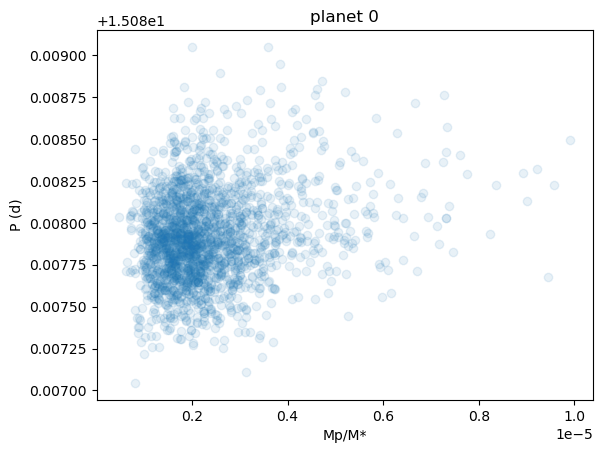

In [11]:
n_planet = 0

mass = df[f'mass_planet_star_ratio_{n_planet}']
period = df[f'period_days_{n_planet}']

plt.figure()
plt.scatter(mass, period, alpha=0.1)
plt.xlabel('Mp/M*')
plt.ylabel('P (d)')
plt.title(f'planet {n_planet}')
plt.show()

Now try plotting the mass-eccentricity diagram:

In [ ]:
n_planet = 0

mass = df[f'mass_planet_star_ratio_{n_planet}']
'''
ecc = df[f'eccentricity_{n_planet}']
k = df[f'k_{n_planet}']
h = df[f'h_{n_planet}']

#
plt.figure()
plt.scatter(mass, ecc, alpha=0.1)
plt.xlabel('Mp/M*')
plt.ylabel('e')
plt.title(f'planet {n_planet}')
plt.show()'''

KeyError: 'eccentricity_0'

### Analysis part 1: examples

Perhaps you might be more interested in comparing the samples for each planet across different analyses.

We have prepared a few useful functions to make histograms and scatter plots of the different parameters. These functions loop over each analysis in your selected list of dictionaries and creates separate subplots for each planet, allowing you to compare the samples for each planet across different analyses.

You can directly plot the following parameters:
- **"period"**      (in days)
- **"k"**           (ecos(varpi))
- **"h"**           (esin(varpi))
- **"incl"**        (inclination in deg)
- **"omega"**       (longitude of ascending node in deg)
- **"mass"**        (in stellar mass)
- **"radius"**      (in stellar radii)
- **"lambda"**      (mean longitude in deg)

You can also extract the following derived parameters:
- **"ecc"**         (eccentricity)
- **"varpi"**       (longitude of pericenter in deg)
- **"density"**     (in stellar density)

We can have a look at the total of planets included in our list of dictionaries:

In [ ]:
get_all_planets(df_list)

['kepler-128 b', 'kepler-128 c']

Let's first make histograms comparing the *mass posteriors* for each planet.

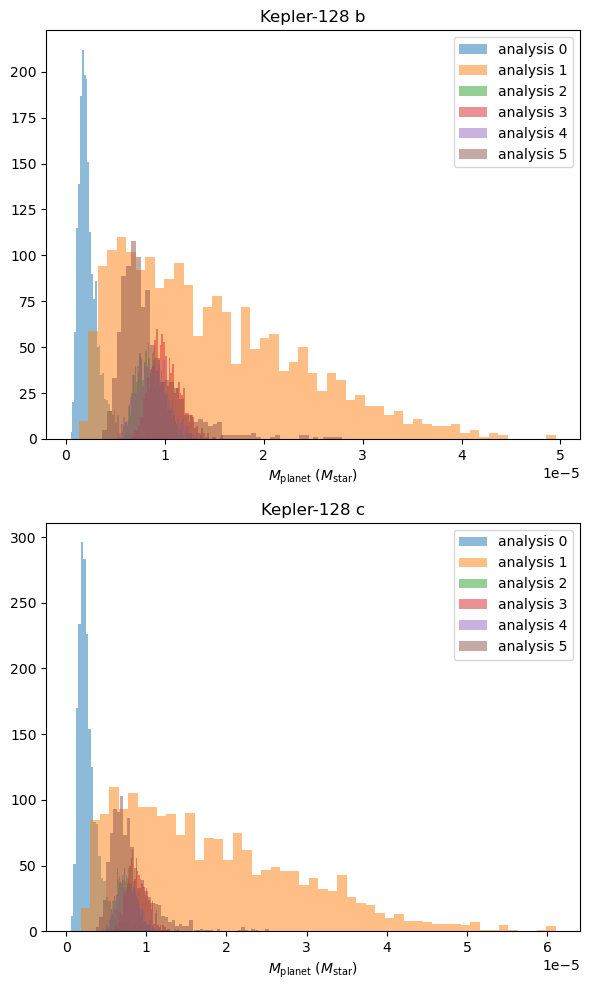

In [ ]:
plot_histograms(df_list, param='mass', units='star')

Let's convert the units to something more intuitive.

Valid units are: **"star"** (default), **"sun"**, **"earth"**, **"jup"**, or **"SI"**

Unit conversion applies to parameters *"mass"*, *"radius"*, or *"density"*

Try changing the units in the above histograms.

Let's now make scatter plots of the different parameters. 

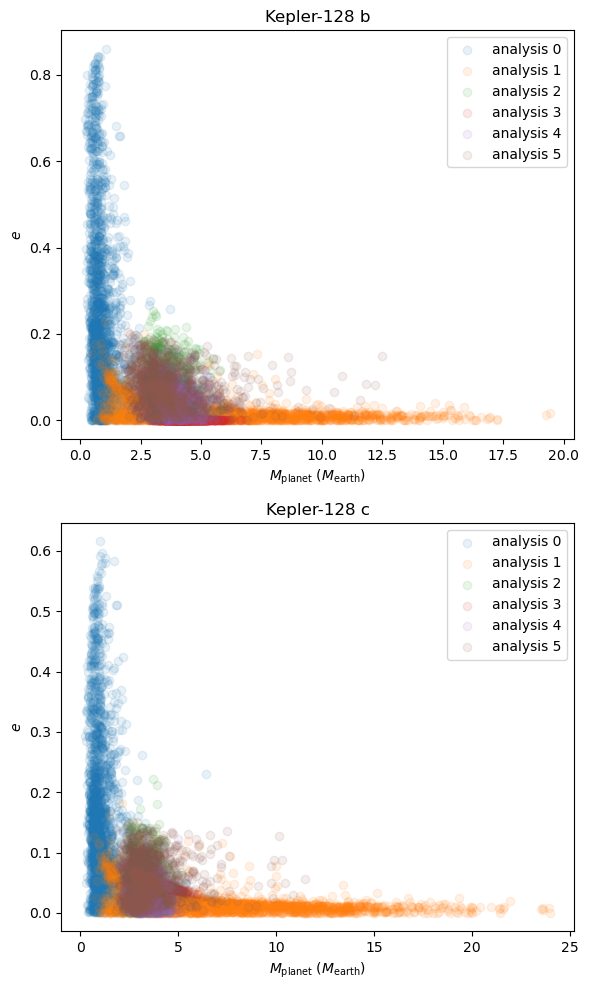

In [ ]:
plot_samples(df_list, x_param='mass', y_param='ecc', units='earth')

Try plotting the **period-density** diagrams with the density in **SI units**:

In [ ]:
#plot_samples()

We might also be interested in the posterior distributions of **consecutive planets**:

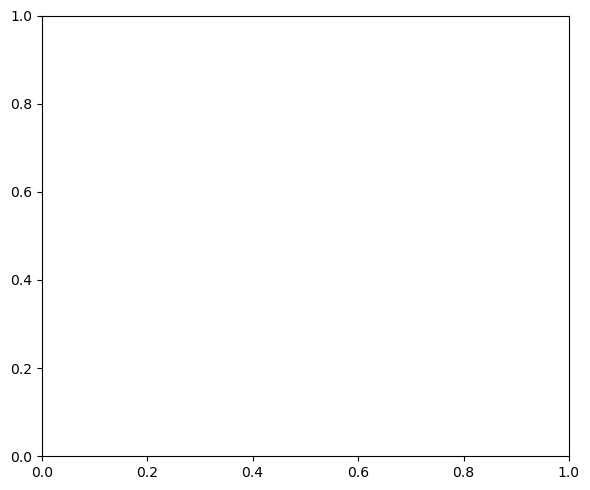

In [ ]:
plot_adjacent_planets(df_list, 
                      param='mass', 
                      planet_pair=['Kepler-51 b', 'Kepler-51 c'],
                      units='earth')

We can also compare the **period ratios** between adjacent planets:

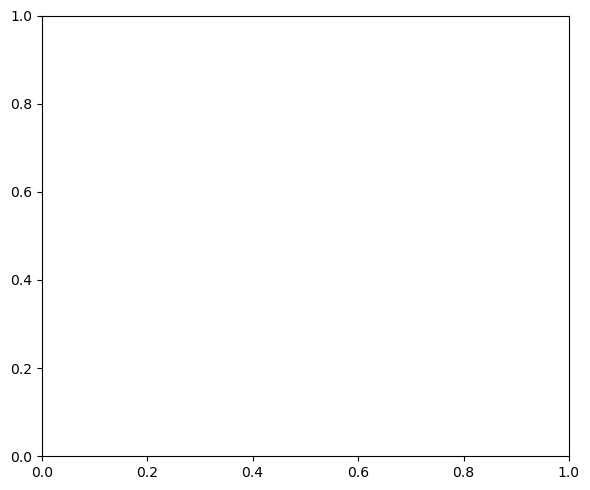

In [ ]:
compare_period_ratios(df_list, planet_pair=['Kepler-51 b', 'Kepler-51 c'])

Let's now look at the **Kepler-80 system**. Search and download the samples into a list of dictionaries as before.

In [ ]:
dataframe_observations_Kepl80 = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-80'])]
df_list_Kepl80 = download_observations_samples(dataframe_observations_Kepl80, download_destination_path)
for k,v in df_list_Kepl80[0].items():
    if k == "sample":
        print(f"{k}:\t...")
    else:
        print(f"{k}:\t{v}")

sample_name:	Kepler-80_0
planets_list:	['Kepler-80 d', 'Kepler-80 e', 'Kepler-80 b', 'Kepler-80 c']
code:	2014ApJ...787..132D
bibtex:	2017AJ....154....5H
contact_email:	shadden1107@gmail.com
sample:	...
readme:	Last column value, 'dt', specifies initial condition date as 'BJD 2454900+dt'



Have a go at visualising the different parameters of the samples as before.

In [ ]:
# your plots here

### Analysis part 2: Second Fundamental Model of Resonance

For the next part we will be plotting the elliptic elements of the **Kepler-54** system into the *Second Fundamental Model* of resonance. 

Let's start by looking at just one of the samples.

In [ ]:
dataframe_observations_Kep54 = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-54'])]
df_list_Kep54 = download_observations_samples(dataframe_observations_Kep54, download_destination_path)

samples = df_list_Kep54[2]['sample']
samples.head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,period_days_1,k_1,h_1,inclination_deg_1,longitude_of_ascending_node_deg_1,mass_planet_star_ratio_1,radius_planet_star_ratio_1,mass_star_m_sun,radius_star_r_sun
0,0.0,173.143899,8.011398,0.037330,0.072483,89.256031,7.466398e-17,0.000020,0.033381,-132.194488,12.071224,0.031173,0.041998,89.301563,-7.664898e-07,0.000013,0.029761,0.461210,0.522
1,1.0,-179.935668,8.011400,-0.025893,0.016049,89.359722,5.336995e-17,0.000021,0.032707,-126.499258,12.071326,-0.019758,-0.003030,89.344849,2.881801e-07,0.000014,0.029435,0.517523,0.522
2,2.0,177.504088,8.011540,-0.003051,0.024661,89.200918,1.404573e-17,0.000017,0.033494,-128.791286,12.070676,0.000663,0.001147,89.406280,-3.186814e-06,0.000012,0.029653,0.516911,0.522
3,3.0,178.030062,8.011495,-0.008226,0.021331,89.216676,1.413979e-17,0.000018,0.032339,-128.189253,12.070817,-0.003605,-0.001559,89.547602,-5.279319e-06,0.000011,0.029216,0.496470,0.522
4,4.0,-175.629953,8.011458,-0.065789,0.054299,89.748860,2.810327e-17,0.000018,0.032034,-123.077205,12.070969,-0.049517,0.025393,89.453155,5.206028e-06,0.000012,0.029509,0.525787,0.522


pair [0, 1] : 0.0 % within resonance.


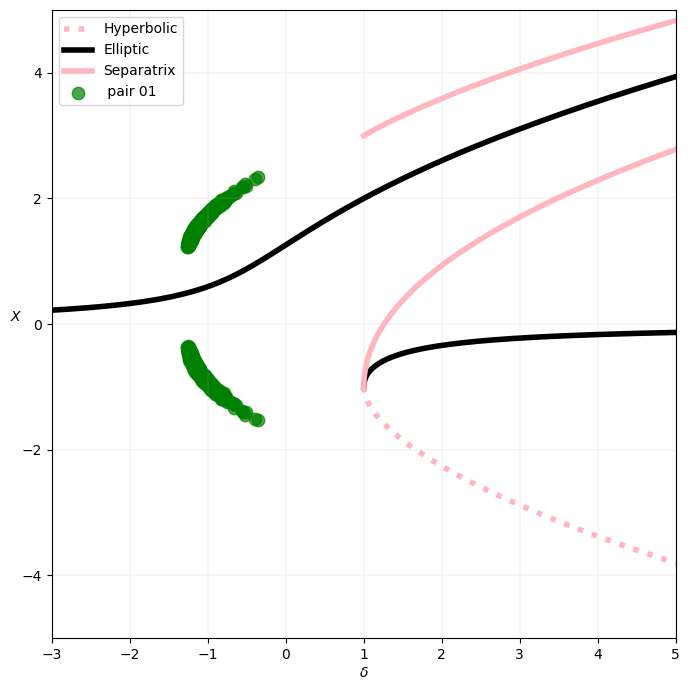

In [ ]:
plot_ell2SFM(samples,                           # data to be plotted (dataframe, dictionary, or list of dicts)
             planet_pairs=[[0,1]],              # pairs of planets to be considered
             resonances=[2],                    # resonance of the corresponding pair (p such that resonance is p:p+1)
             colors=[['green']],                # list of colors to be considered for each pair in each analysis
             delta_lim=(-3,5),                  # limits of the x-axis
             X_lim=(-5,5),                      # limits of the y-axis
             check_resonance=True               # check % of samples within resonance
             )

Let's compare the samples for this pair of planets from *two separate analyses*:

Analysis Kepler-54_1 :
pair [0, 1] : 0.0 % within resonance.
Analysis Kepler-54_2 :
pair [0, 1] : 0.0 % within resonance.


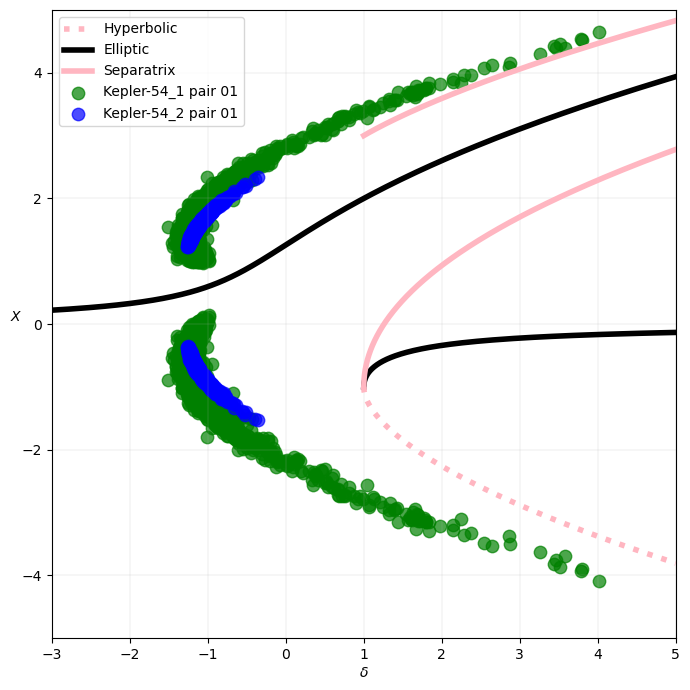

In [ ]:
plot_ell2SFM(df_list_Kep54[1:3],                # this time we are plotting two of the dictionaries in the list
             planet_pairs=[[0,1]],              # pairs of planets to be considered
             resonances=[2],                    # resonance of the corresponding pair (p such that resonance is p:p+1)
             colors=[['green'],['blue']],       # here we give each analysis its own list of colours
             delta_lim=(-3,5),                  # limits of the x-axis
             X_lim=(-5,5),                      # limits of the y-axis
             check_resonance=True               # check % of samples within resonance
             )

Now let's go back to your list of samples for the **Kepler-80 system**. Start by extracting one dataframe of samples and try plotting the SFM for *two or more planet pairs* in the analysis.

In [ ]:
#samples_Kepl80

In [ ]:
#plot_ell2SFM(samples_Kepl80,                      
#             planet_pairs=[],            
#             resonances=[],                     
#             colors=[[]],       
#             delta_lim=(-15,15),                 
#             X_lim=(-5,5),
#             check_resonance=True                      
#             )

In [ ]:
dataframe_observations_Kep128 = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-128'])]
df_list_Kep128 = download_observations_samples(dataframe_observations_Kep128, download_destination_path)

samples = df_list_Kep128[0]['sample']
samples.head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,period_days_1,k_1,h_1,inclination_deg_1,longitude_of_ascending_node_deg_1,mass_planet_star_ratio_1,radius_planet_star_ratio_1,mass_star_m_sun,radius_star_r_sun,BJD2454900+dt
0,0.0,54.0,15.087805,-0.070867,-0.051585,90.0,0.0,0.000005,0.00807,302.739142,22.805533,-0.022760,-0.063253,90.0,0.0,0.000008,0.00732,1.18,1.66,76.899626
1,1.0,54.0,15.087788,-0.134095,0.125742,90.0,0.0,0.000001,0.00807,296.984909,22.805926,-0.005105,-0.005545,90.0,0.0,0.000002,0.00732,1.18,1.66,76.670609
2,2.0,54.0,15.087959,-0.086533,0.065153,90.0,0.0,0.000001,0.00807,294.937435,22.805765,0.037473,-0.073900,90.0,0.0,0.000001,0.00732,1.18,1.66,76.866486
3,3.0,54.0,15.087717,0.020024,-0.022480,90.0,0.0,0.000003,0.00807,297.583885,22.806408,0.078544,-0.083465,90.0,0.0,0.000003,0.00732,1.18,1.66,77.351135
4,4.0,54.0,15.088269,-0.758280,-0.136253,90.0,0.0,0.000002,0.00807,307.305671,22.805606,-0.474529,-0.147305,90.0,0.0,0.000002,0.00732,1.18,1.66,73.663586


In [ ]:
download_destination_path = None
df_list = download_observations_samples(dataframe_observations_Kep128, download_destination_path)

In [ ]:
for k,v in df_list[0].items():
    if k == "sample":
        print(f"{k}:\t...")
    else:
        print(f"{k}:\t{v}")

sample_name:	Kepler-128_0
planets_list:	['Kepler-128 b', 'Kepler-128 c']
code:	2014ApJ...787..132D
bibtex:	2017AJ....154....5H
contact_email:	shadden1107@gmail.com
sample:	...
readme:	Last column value, 'dt', specifies initial condition date as 'BJD 2454900+dt'



0 shadden1107@gmail.com
1 shadden1107@gmail.com
2 adrien.leleu@unige.ch
3 adrien.leleu@unige.ch
4 adrien.leleu@unige.ch
[['C0'], ['C1'], ['C2'], ['C3'], ['C4']]
     sample_index  mean_longitude_deg_0  period_days_0       k_0       h_0  \
0             0.0             66.157375      15.086087  0.102560 -0.029821   
1             1.0             88.844652      15.086414 -0.093263  0.014721   
2             2.0             65.404212      15.086176  0.117610  0.058689   
3             3.0             76.185960      15.086370  0.017134  0.012372   
4             4.0             74.186877      15.086204  0.034695  0.034452   
..            ...                   ...            ...       ...       ...   
995         995.0             77.080438      15.086277  0.009528  0.018554   
996         996.0             80.483737      15.086352 -0.019932 -0.004732   
997         997.0             70.378837      15.086306  0.071929  0.071791   
998         998.0             85.600828      15.086423 -0.0

IndexError: list index out of range

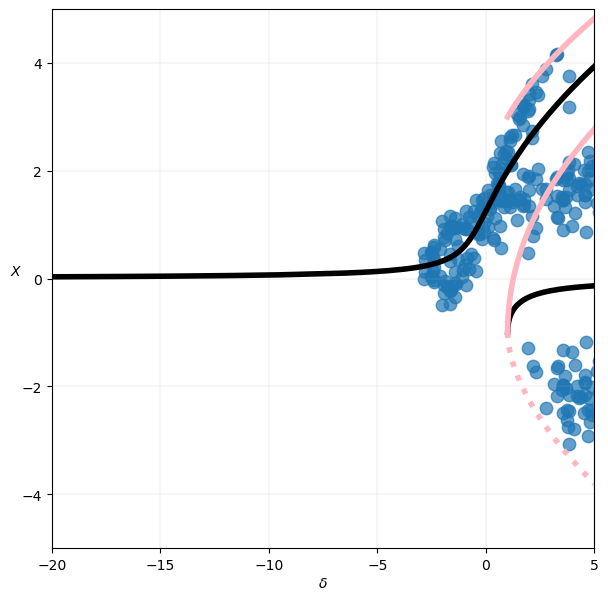

In [ ]:

T_colors=[]
for k in range(5):
    print(k,df_list_Kep128[k]['contact_email'])
    T_colors.append(['C'+str(k)])


k=0


print(T_colors)

print(df_list_Kep128[2]['sample'])

plot_ell2SFM(df_list_Kep128[:5],                # this time we are plotting two of the dictionaries in the list
             planet_pairs=[[0,1],[0,1],[0,1],[0,1],[0,1]],              # pairs of planets to be considered
             resonances=[2,2,2,2,2],                    # resonance of the corresponding pair (p such that resonance is p:p+1)
             colors=T_colors,       # here we give each analysis its own list of colours
             delta_lim=(-20,5),                  # limits of the x-axis
             X_lim=(-5,5),                      # limits of the y-axis
             check_resonance=True               # check % of samples within resonance
             )

In [ ]:
nb_analysis=len(df_list_Kep54)
print(nb_analysis)

6


In [ ]:
Pr=df_list_Kep128[0]['sample']['period_days_1'].values/df_list_Kep128[0]['sample']['period_days_0'].values
print(Pr)

[1.51152093 1.51154869 1.51152085 ... 1.51149597 1.51143103 1.51154122]


In [32]:
print(df_list_Kep54[0].keys())

dict_keys(['sample_name', 'planets_list', 'code', 'bibtex', 'contact_email', 'sample', 'readme'])
